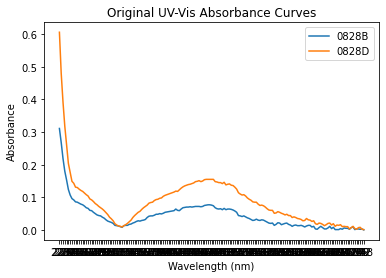

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, root_scalar

# Function to load the UV-Vis dataset from the given file path
def load_uv_vis_data(file_path):
    reading_data = False
    header = None
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if reading_data:
                data.append([float(part) if part.replace('.', '', 1).isdigit() else part for part in parts])
            else:
                if sum(part.replace('.', '', 1).isdigit() for part in parts) > len(parts) / 2:
                    reading_data = True
                    header = parts
    df = pd.DataFrame(data, columns=header)
    df.dropna(axis=1, how='all', inplace=True)
    return df

# Load the dataset for UV-Vis
file_path = 'C:\\Users\\ryanv\\OneDrive\\Desktop\\SilverGrowthReport2.txt'  # Update this path to your actual file path
df = load_uv_vis_data(file_path)

# Initialize a dictionary to store the data for each sample
sample_data = {}

# Transpose the DataFrame
df_transposed = df.drop(columns=df.columns[df.dtypes != 'float64']).transpose()
df_transposed.columns = df['Sample ID']
df_transposed.reset_index(inplace=True)
df_transposed.rename(columns={'index': 'Wavelength'}, inplace=True)

# Plot UV-Vis absorbance curves for all samples
plt.figure()
for column in df_transposed.columns[1:]:  # Skip the first column assuming it's Wavelength
    plt.plot(df_transposed['Wavelength'], df_transposed[column], label=column)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.legend()
plt.title('Original UV-Vis Absorbance Curves')
plt.show()

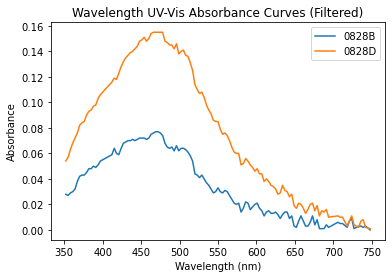

In [25]:
def filter_wavelength(df_transposed):
    """
    Filters the transposed DataFrame to only include samples with wavelengths of 350 nm or greater.

    Parameters:
    - df_transposed (pd.DataFrame): The transposed DataFrame containing the UV-Vis data.

    Returns:
    - pd.DataFrame: A new DataFrame containing only the samples with wavelengths of 350 nm or greater.
    """
    # Convert the 'Wavelength' column to numeric, if it's not already
    df_transposed['Wavelength'] = pd.to_numeric(df_transposed['Wavelength'], errors='coerce')

    # Filter the DataFrame based on the wavelength condition
    filtered_df = df_transposed[df_transposed['Wavelength'] >= 350]

    return filtered_df


# Redefine the load_uv_vis_data function and proceed with the demonstration
def load_uv_vis_data(file_path):
    reading_data = False
    header = None
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if reading_data:
                data.append([float(part) if part.replace('.', '', 1).isdigit() else part for part in parts])
            else:
                if sum(part.replace('.', '', 1).isdigit() for part in parts) > len(parts) / 2:
                    reading_data = True
                    header = parts
    df = pd.DataFrame(data, columns=header)
    df.dropna(axis=1, how='all', inplace=True)
    return df

# Load the data, transpose it, and then filter it using the new function
df = load_uv_vis_data(file_path)
df_transposed = df.drop(columns=df.columns[df.dtypes != 'float64']).transpose()
df_transposed.columns = df['Sample ID']
df_transposed.reset_index(inplace=True)
df_transposed.rename(columns={'index': 'Wavelength'}, inplace=True)

# Apply the filter function
filtered_df = filter_wavelength(df_transposed)
filtered_df.head()

# Plot UV-Vis absorbance curves for all samples
plt.figure()
for column in df_transposed.columns[1:]:  # Skip the first column assuming it's Wavelength
    plt.plot(filtered_df['Wavelength'], filtered_df[column], label=column)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.legend()
plt.title('Wavelength UV-Vis Absorbance Curves (Filtered)')
plt.show()

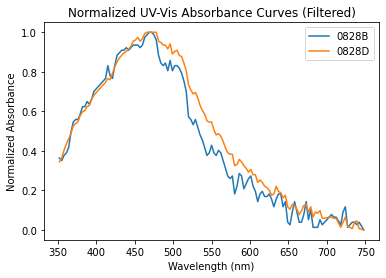

In [24]:
#Import the required library for plotting
import matplotlib.pyplot as plt

# Normalize the filtered DataFrame along each sample (excluding the 'Wavelength' column)
normalized_df = filtered_df.copy()
for column in normalized_df.columns[1:]:  # Skip the first column (Wavelength)
    min_val = normalized_df[column].min()
    max_val = normalized_df[column].max()
    normalized_df[column] = (normalized_df[column] - min_val) / (max_val - min_val)

# Plot the normalized UV-Vis absorbance curves for all samples with filtered wavelengths
plt.figure()
for column in normalized_df.columns[1:]:  # Skip the first column (Wavelength)
    plt.plot(normalized_df['Wavelength'], normalized_df[column], label=column)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized Absorbance')
plt.legend()
plt.title('Normalized UV-Vis Absorbance Curves (Filtered)')
plt.show()